In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("not_final3.csv")

# Rename 'Sport_-1' for clarity
df = df.rename(columns={'Sport_-1': 'Sport'})

# Show dataset structure and preview
print("Dataset loaded successfully.\n")
print("Columns in the dataset:")
print(df.columns)

print("\nPreview of the dataset:")
print(df.head())

print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values summary:")
print(df.isnull().sum())


Dataset loaded successfully.

Columns in the dataset:
Index(['Unnamed: 0', 'Sport', 'drug_1896', 'Female_1896', 'Male_1896',
       'total_1896', 'equity_1896', 'country_1896', '10.0_1896', '17.0_1896',
       ...
       'CV_1980', 'CV_1984', 'CV_1988', 'CV_1992', 'CV_1996', 'CV_2000',
       'CV_2004', 'CV_2008', 'CV_2012', 'CV_2016'],
      dtype='object', length=1757)

Preview of the dataset:
   Unnamed: 0             Sport  drug_1896  Female_1896  Male_1896  \
0           0     Alpine Skiing        0.0          NaN        NaN   
1           1          Alpinism        0.0          NaN        NaN   
2           2           Archery        0.0          NaN        NaN   
3           3  Art Competitions        0.0          NaN        NaN   
4           4         Athletics        0.0          NaN      106.0   

   total_1896  equity_1896  country_1896  10.0_1896  17.0_1896  ...   CV_1980  \
0         0.0          NaN           NaN        NaN        NaN  ...  0.941454   
1         0.0     

In [2]:
# Example for one parameter and sport (you can loop through all sports later)
parameter = 'drug'
sport_name = 'Athletics'  # Example sport
# Filter raw data for Athletics and drug parameter
raw_data = df[df['Sport'] == 'Athletics'].filter(regex=f'{parameter}_\d+')

# Melt raw data for better visualization
raw_melted = raw_data.melt(var_name='Year', value_name='Value')
raw_melted['Year'] = raw_melted['Year'].str.extract('(\d+)').astype(int)

print("\nRaw data for Athletics (drug):")
print(raw_melted.sort_values('Year'))

# Re-prepare the series and compare
ts_data_check = raw_melted.set_index('Year')['Value'].sort_index()
# Replace NaN with 0 specifically for 'drug' parameter
ts_data_check = ts_data_check.fillna(0)


print("\nRechecked time series data for Athletics (drug):")
print(ts_data_check)



Raw data for Athletics (drug):
    Year  Value
0   1896    0.0
1   1900    NaN
2   1904    NaN
3   1906    NaN
4   1908    NaN
5   1912    NaN
6   1920    NaN
7   1924    NaN
8   1928    NaN
9   1932    NaN
10  1936    NaN
11  1948    NaN
12  1952    NaN
13  1956    NaN
14  1960    NaN
15  1964    NaN
16  1968    NaN
17  1972    NaN
18  1976    1.0
19  1980    NaN
20  1984    4.0
21  1988    1.0
22  1992    5.0
23  1996    7.0
24  2000    4.0
25  2004   17.0
26  2008   46.0
27  2012   86.0
28  2016    2.0
29  2020    7.0
30  2024    2.0

Rechecked time series data for Athletics (drug):
Year
1896     0.0
1900     0.0
1904     0.0
1906     0.0
1908     0.0
1912     0.0
1920     0.0
1924     0.0
1928     0.0
1932     0.0
1936     0.0
1948     0.0
1952     0.0
1956     0.0
1960     0.0
1964     0.0
1968     0.0
1972     0.0
1976     1.0
1980     0.0
1984     4.0
1988     1.0
1992     5.0
1996     7.0
2000     4.0
2004    17.0
2008    46.0
2012    86.0
2016     2.0
2020     7.0
2024     2.

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_641144/1984988609.py:5: SyntaxWarning: invalid escape sequence '\d'
  raw_data = df[df['Sport'] == 'Athletics'].filter(regex=f'{parameter}_\d+')
/tmp/ipykernel_641144/1984988609.py:9: SyntaxWarning: invalid escape sequence '\d'
  raw_melted['Year'] = raw_melted['Year'].str.extract('(\d+)').astype(int)


In [3]:
# Example for parameter and sport
parameter = 'equity'
sport_name = 'Athletics'

# Filter columns that match the parameter
param_columns = [col for col in df.columns if col.startswith(f"{parameter}_")]

# Melt the data for 'equity'
melted_data_equity = df[['Sport'] + param_columns].melt(id_vars='Sport', var_name='Year', value_name='Value')

# Extract the year from column names
melted_data_equity['Year'] = melted_data_equity['Year'].str.extract('(\d+)').astype(int)

# Filter data for the specified sport
sport_data_equity = melted_data_equity[melted_data_equity['Sport'] == sport_name].sort_values('Year')

print(f"Raw data for {sport_name} ({parameter}):")
print(sport_data_equity)

Raw data for Athletics (equity):
          Sport  Year     Value
4     Athletics  1896  0.000000
72    Athletics  1900  0.000000
140   Athletics  1904  0.000000
208   Athletics  1906  0.000000
276   Athletics  1908  0.000000
344   Athletics  1912  0.000000
412   Athletics  1920  0.000000
480   Athletics  1924  0.000000
548   Athletics  1928  0.130040
616   Athletics  1932  0.153257
684   Athletics  1936  0.133069
752   Athletics  1948  0.224548
820   Athletics  1952  0.223214
888   Athletics  1956  0.213228
956   Athletics  1960  0.205793
1024  Athletics  1964  0.256929
1092  Athletics  1968  0.263197
1160  Athletics  1972  0.300119
1228  Athletics  1976  0.323053
1296  Athletics  1980  0.294953
1364  Athletics  1984  0.302867
1432  Athletics  1988  0.357905
1500  Athletics  1992  0.369523
1568  Athletics  1996  0.375524
1636  Athletics  2000  0.417747
1704  Athletics  2004  0.460230
1772  Athletics  2008  0.475936
1840  Athletics  2012  0.481563
1908  Athletics  2016  0.481659
1976  A

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_641144/3914523016.py:12: SyntaxWarning: invalid escape sequence '\d'
  melted_data_equity['Year'] = melted_data_equity['Year'].str.extract('(\d+)').astype(int)


In [4]:
import pandas as pd
import numpy as np

# Reload the dataset
df = pd.read_csv("not_final3.csv")
df = df.rename(columns={'Sport_-1': 'Sport'})

# List of sports to exclude
excluded_sports = ['climbing', 'Fitness', 'Headis']

# Filter out excluded sports
df = df[~df['Sport'].isin(excluded_sports)]

parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV']

for parameter in parameters:
    print(f"\nProcessing parameter: {parameter}")
    
    # Melt the data for this parameter
    param_columns = [col for col in df.columns if col.startswith(f"{parameter}_")]
    melted_data = df[['Sport'] + param_columns].melt(id_vars='Sport', var_name='Year', value_name='Value')
    melted_data['Year'] = melted_data['Year'].str.extract(r'(\d+)').astype(int)  # Use raw string

    for sport_name in melted_data['Sport'].unique():
        print(f"\nProcessing sport: {sport_name} ({parameter})")

        # Filter and sort the data for the specific sport and parameter
        sport_data = melted_data[melted_data['Sport'] == sport_name].sort_values('Year')
        
        if parameter == 'drug':
            # For 'drug', replace missing values with 0
            sport_data['Value'] = sport_data['Value'].fillna(0)
        elif parameter in ['CV', 'popularity']:
            # For 'CV' and 'popularity', treat 0 as missing and drop
            sport_data = sport_data[sport_data['Value'] != 0].dropna(subset=['Value'])
        else:
            # For other parameters, drop missing values
            sport_data = sport_data.dropna(subset=['Value'])

        # Set Year as index and ensure continuity
        ts_data = sport_data.set_index('Year')['Value']
        
        print(f"Raw data for {sport_name} ({parameter}):\n", sport_data)
        print(f"\nPrepared time series data for {sport_name} ({parameter}):\n", ts_data)



Processing parameter: drug

Processing sport: Alpine Skiing (drug)
Raw data for Alpine Skiing (drug):
               Sport  Year  Value
0     Alpine Skiing  1896    0.0
65    Alpine Skiing  1900    0.0
130   Alpine Skiing  1904    0.0
195   Alpine Skiing  1906    0.0
260   Alpine Skiing  1908    0.0
325   Alpine Skiing  1912    0.0
390   Alpine Skiing  1920    0.0
455   Alpine Skiing  1924    0.0
520   Alpine Skiing  1928    0.0
585   Alpine Skiing  1932    0.0
650   Alpine Skiing  1936    0.0
715   Alpine Skiing  1948    0.0
780   Alpine Skiing  1952    0.0
845   Alpine Skiing  1956    0.0
910   Alpine Skiing  1960    0.0
975   Alpine Skiing  1964    0.0
1040  Alpine Skiing  1968    0.0
1105  Alpine Skiing  1972    0.0
1170  Alpine Skiing  1976    0.0
1235  Alpine Skiing  1980    0.0
1300  Alpine Skiing  1984    0.0
1365  Alpine Skiing  1988    0.0
1430  Alpine Skiing  1992    0.0
1495  Alpine Skiing  1996    0.0
1560  Alpine Skiing  2000    0.0
1625  Alpine Skiing  2004    0.0
1690 

In [5]:
melted_data

,Sport,Year,Value
0,Alpine Skiing,1896,0.000000
1,Alpinism,1896,0.000000
2,Archery,1896,0.000000
3,Art Competitions,1896,0.000000
4,Athletics,1896,1.001050
...,...,...,...
1880,Tug-Of-War,2016,0.000000
1881,Volleyball,2016,0.833920
1882,Water Polo,2016,0.776958
1883,Weightlifting,2016,0.802138


In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

def incremental_backtest(ts_data, model_func, order, seasonal_order=None, sport_name="", parameter=""):
    predictions = []
    actuals = []
    indices = []

    for t in range(len(ts_data) - 1):
        train = ts_data.iloc[: t + 1]

        if len(train) <= max(order):
            continue

        if model_func == ARIMA:
            model = model_func(train, order=order)
        elif model_func == SARIMAX:
            model = model_func(train, order=order, seasonal_order=seasonal_order)
        else:
            raise ValueError("Unsupported model function")

        try:
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=1)
            forecast_value = forecast.iloc[0] if isinstance(forecast, pd.Series) else forecast[0]
        except ValueError as e:
            print(f"Error for {sport_name} ({parameter}): {e}")
            continue

        predictions.append(forecast_value)
        actuals.append(ts_data.iloc[t + 1])
        indices.append(ts_data.index[t + 1])

    mse = mean_squared_error(actuals, predictions)
    print(f"\nMSE for {sport_name} ({parameter}): {mse:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(indices, actuals, label="Actual", marker="o")
    plt.plot(indices, predictions, label=f"{model_func.__name__} Predicted", linestyle="--", marker="x")
    plt.title(f"{model_func.__name__} Predictions for {sport_name} ({parameter})")
    plt.xlabel("Year")
    plt.ylabel(f"{parameter} Values")
    plt.legend()
    plt.grid(True)
    plt.show()

    return mse


In [7]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error, r2_score  # Added r2_score import
# from pmdarima.arima import auto_arima
# import warnings
# import os
# import matplotlib.pyplot as plt

# warnings.filterwarnings('ignore')

# # Ensure output directory for plots
# output_dir = "model_plots"
# os.makedirs(output_dir, exist_ok=True)

# MIN_DATA_POINTS = 5  # Minimum data points to fit the model

# # Data tracking
# metrics = []

# def incremental_backtest(ts_data, model_func, order, seasonal_order=None, sport_name="", parameter=""):
#     predictions, actuals, indices = [], [], []

#     for t in range(len(ts_data) - 1):
#         train = ts_data.iloc[:t + 1]

#         if len(train) <= max(order):
#             continue

#         if model_func == ARIMA:
#             model = model_func(train, order=order)
#         elif model_func == SARIMAX:
#             model = model_func(train, order=order, seasonal_order=seasonal_order)
#         else:
#             raise ValueError("Unsupported model function")

#         try:
#             model_fit = model.fit(disp=False)
#             forecast = model_fit.forecast(steps=1)
#             forecast_value = forecast.iloc[0] if isinstance(forecast, pd.Series) else forecast[0]
#         except Exception as e:
#             print(f"Fitting error for {sport_name} ({parameter}): {e}")
#             break

#         predictions.append(forecast_value)
#         actuals.append(ts_data.iloc[t + 1])
#         indices.append(ts_data.index[t + 1])

#     if predictions:
#         # Check for all-zero predictions
#         if np.all(np.array(predictions) == 0):
#             print(f"Model predicted all zeros for {sport_name} ({parameter}). Investigate model or data.")
#             return

#         # Calculate metrics
#         mse = mean_squared_error(actuals, predictions)
#         r2 = r2_score(actuals, predictions)
#         metrics.append({
#             'Sport': sport_name,
#             'Parameter': parameter,
#             'Model': model_func.__name__,
#             'MSE': mse,
#             'R2': r2
#         })

#         # Save plot
#         plt.figure(figsize=(10, 6))
#         plt.plot(indices, actuals, label='Actual', marker='o', linestyle='-')
#         plt.plot(indices, predictions, label=f'{model_func.__name__} Predicted', marker='x', linestyle='--')
#         plt.title(f'Actual vs Predicted for {sport_name} ({parameter})')
#         plt.xlabel('Year')
#         plt.ylabel('Value')
#         plt.legend()
#         plt.grid(True)
#         plt.tight_layout()
#         plt.savefig(f"{output_dir}/{sport_name}_{parameter}_{model_func.__name__}.png")
#         plt.close()
#     else:
#         print(f"No predictions made for {sport_name} ({parameter}).")


# # Load dataset
# df = pd.read_csv("not_final3.csv")
# df = df.rename(columns={'Sport_-1': 'Sport'})

# parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV']

# for parameter in parameters:
#     print(f"\nProcessing parameter: {parameter}")

#     param_columns = [col for col in df.columns if col.startswith(f"{parameter}_")]
#     melted_data = df[['Sport'] + param_columns].melt(id_vars='Sport', var_name='Year', value_name='Value')
#     melted_data['Year'] = melted_data['Year'].str.extract(r'(\d+)').astype(int)

#     for sport_name in melted_data['Sport'].unique():
#         sport_data = melted_data[melted_data['Sport'] == sport_name].sort_values('Year')

#         if parameter == 'drug':
#             sport_data['Value'] = sport_data['Value'].fillna(0)
#         elif parameter in ['CV', 'popularity']:
#             sport_data = sport_data[sport_data['Value'] != 0].dropna(subset=['Value'])
#         else:
#             sport_data = sport_data.dropna(subset=['Value'])

#         if sport_data['Value'].sum() == 0:
#             print(f"All zero values for {sport_name} ({parameter}), skipping.")
#             continue

#         ts_data = sport_data.set_index('Year')['Value']

#         if len(ts_data) < MIN_DATA_POINTS:
#             print(f"Insufficient data for {sport_name} ({parameter})")
#             continue

#         auto_arima_model = auto_arima(ts_data, seasonal=False, trace=False)
#         arima_order = auto_arima_model.order

#         auto_sarima_model = auto_arima(ts_data, seasonal=True, m=1, trace=False)
#         sarima_order = auto_sarima_model.order
#         sarima_seasonal_order = auto_sarima_model.seasonal_order

#         print(f"Optimal ARIMA order: {arima_order}")
#         print(f"Optimal SARIMA order: {sarima_order}, Seasonal: {sarima_seasonal_order}")

#         incremental_backtest(ts_data, ARIMA, arima_order, sport_name=sport_name, parameter=parameter)
#         incremental_backtest(ts_data, SARIMAX, sarima_order, seasonal_order=sarima_seasonal_order, sport_name=sport_name, parameter=parameter)


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from pmdarima.arima import auto_arima
import warnings
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import logging

warnings.filterwarnings('ignore')

# Setup unified logging
log_file = "model_processing.log"
logging.basicConfig(filename=log_file, level=logging.INFO, format='%(asctime)s - %(message)s')

# Ensure output directory for plots
output_dir = "model_plots"
os.makedirs(output_dir, exist_ok=True)

MIN_DATA_POINTS = 5  # Minimum data points to fit the model

# Data tracking
metrics = []

def log_message(message):
    print(message)  # For console viewing (optional)
    logging.info(message)  # For saving into the log file

def incremental_backtest(ts_data, model_func, order, seasonal_order=None, sport_name="", parameter=""):
    predictions, actuals, indices = [], [], []

    for t in range(len(ts_data) - 1):
        train = ts_data.iloc[:t + 1]

        if len(train) <= max(order):
            continue

        if np.all(train == train.iloc[0]):  # Constant series detected
            constant_value = train.iloc[0]
            log_message(f"Constant series detected for {sport_name} ({parameter}). Predicting constant value: {constant_value}")
            predictions.append(constant_value)
            actuals.append(ts_data.iloc[t + 1])
            indices.append(ts_data.index[t + 1])
            continue

        if model_func == ARIMA:
            model = model_func(train, order=order)
        elif model_func == SARIMAX:
            model = model_func(train, order=order, seasonal_order=seasonal_order)
        else:
            raise ValueError("Unsupported model function")

        try:
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=1)
            forecast_value = forecast.iloc[0] if isinstance(forecast, pd.Series) else forecast[0]
            predictions.append(forecast_value)
            actuals.append(ts_data.iloc[t + 1])
            indices.append(ts_data.index[t + 1])
        except Exception as e:
            log_message(f"Fitting error for {sport_name} ({parameter}): {e}")
            break

    if predictions:
        mse = mean_squared_error(actuals, predictions)
        r2 = r2_score(actuals, predictions)
        metrics.append({
            'Sport': sport_name,
            'Parameter': parameter,
            'Model': model_func.__name__,
            'MSE': mse,
            'R2': r2
        })
        log_message(f"Metrics for {sport_name} ({parameter}) - MSE: {mse}, R2: {r2}")

        # Save plot
        plt.figure(figsize=(10, 6))
        plt.plot(indices, actuals, label='Actual', marker='o', linestyle='-')
        plt.plot(indices, predictions, label=f'{model_func.__name__} Predicted', marker='x', linestyle='--')
        plt.title(f'Actual vs Predicted for {sport_name} ({parameter})')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{output_dir}/{sport_name}_{parameter}_{model_func.__name__}.png")
        plt.close()
    else:
        log_message(f"No predictions made for {sport_name} ({parameter}).")

def check_stationarity(ts_data):
    if np.all(ts_data == ts_data.iloc[0]):
        log_message("Series is constant, skipping stationarity test.")
        return False
    result = adfuller(ts_data)
    log_message(f"ADF Statistic: {result[0]}, p-value: {result[1]}")
    return result[1] <= 0.05  # True if stationary

# Load dataset
df = pd.read_csv("not_final3.csv")
df = df.rename(columns={'Sport_-1': 'Sport'})

parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV']

for parameter in parameters:
    log_message(f"\nProcessing parameter: {parameter}")

    param_columns = [col for col in df.columns if col.startswith(f"{parameter}_")]
    melted_data = df[['Sport'] + param_columns].melt(id_vars='Sport', var_name='Year', value_name='Value')
    melted_data['Year'] = melted_data['Year'].str.extract(r'(\d+)').astype(int)

    for sport_name in melted_data['Sport'].unique():
        sport_data = melted_data[melted_data['Sport'] == sport_name].sort_values('Year')

        if parameter == 'drug':
            sport_data['Value'] = sport_data['Value'].fillna(0)
        elif parameter in ['CV', 'popularity']:
            sport_data = sport_data[sport_data['Value'] != 0].dropna(subset=['Value'])
        else:
            sport_data = sport_data.dropna(subset=['Value'])

        if sport_data['Value'].sum() == 0:
            log_message(f"All zero values for {sport_name} ({parameter}), skipping.")
            continue

        ts_data = sport_data.set_index('Year')['Value']

        if len(ts_data) < MIN_DATA_POINTS:
            log_message(f"Insufficient data for {sport_name} ({parameter})")
            continue

        log_message(f"Checking stationarity for {sport_name} ({parameter}):")
        is_stationary = check_stationarity(ts_data)

        if not is_stationary:
            log_message(f"Skipping ARIMA fitting for non-stationary series: {sport_name} ({parameter})")
            continue

        auto_arima_model = auto_arima(ts_data, seasonal=False, trace=False)
        arima_order = auto_arima_model.order

        auto_sarima_model = auto_arima(ts_data, seasonal=True, m=1, trace=False)
        sarima_order = auto_sarima_model.order
        sarima_seasonal_order = auto_sarima_model.seasonal_order

        log_message(f"Optimal ARIMA order: {arima_order}")
        log_message(f"Optimal SARIMA order: {sarima_order}, Seasonal: {sarima_seasonal_order}")

        incremental_backtest(ts_data, ARIMA, arima_order, sport_name=sport_name, parameter=parameter)
        incremental_backtest(ts_data, SARIMAX, sarima_order, seasonal_order=sarima_seasonal_order, sport_name=sport_name, parameter=parameter)

# Save metrics to CSV
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('model_metrics.csv', index=False)
log_message("\nMetrics saved to 'model_metrics.csv'")



Processing parameter: drug
All zero values for Alpine Skiing (drug), skipping.
All zero values for Alpinism (drug), skipping.
All zero values for Archery (drug), skipping.
All zero values for Art Competitions (drug), skipping.
Checking stationarity for Athletics (drug):
ADF Statistic: -4.192742011211175, p-value: 0.0006777900599018148
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Athletics (drug). Predicting constant value: 0.0
Constant series detected for Athletics (drug). Predicting constant value: 0.0
Constant series detected for Athletics (drug). Predicting constant value: 0.0
Constant series detected for Athletics (drug). Predicting constant value: 0.0
Constant series detected for Athletics (drug). Predicting constant value: 0.0
Constant series detected for Athletics (drug). Predicting constant value: 0.0
Constant series detected for Athletics (drug). Predicting constant value: 0.0
Constant series detected for 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


All zero values for Badminton (drug), skipping.
Checking stationarity for Baseball (drug):
ADF Statistic: -5.47722557505166, p-value: 2.3270204083626223e-06
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting constant value: 0.0
Constant series detected for Baseball (drug). Predicting consta

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (drug). Predicting constant value: 0.0
Constant series detected for Basketball (dru

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai

All zero values for Basque Pelota (drug), skipping.
All zero values for Beach Volleyball (drug), skipping.
All zero values for Biathlon (drug), skipping.
All zero values for Bobsleigh (drug), skipping.
Checking stationarity for Boxing (drug):
ADF Statistic: 3.982272035664781, p-value: 1.0
Skipping ARIMA fitting for non-stationary series: Boxing (drug)
Checking stationarity for Canoeing (drug):
ADF Statistic: -0.28284271247461873, p-value: 0.9278994117565711
Skipping ARIMA fitting for non-stationary series: Canoeing (drug)
All zero values for Cricket (drug), skipping.
All zero values for Croquet (drug), skipping.
All zero values for Cross Country Skiing (drug), skipping.
All zero values for Curling (drug), skipping.
Checking stationarity for Cycling (drug):
ADF Statistic: 2.906819354215189, p-value: 1.0
Skipping ARIMA fitting for non-stationary series: Cycling (drug)
All zero values for Diving (drug), skipping.
Checking stationarity for Equestrianism (drug):
ADF Statistic: 12.5103815225

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ADF Statistic: 0.7499437105973383, p-value: 0.9907836538469655
Skipping ARIMA fitting for non-stationary series: Judo (drug)
All zero values for Lacrosse (drug), skipping.
All zero values for Luge (drug), skipping.
All zero values for Military Ski Patrol (drug), skipping.
Checking stationarity for Modern Pentathlon (drug):
ADF Statistic: -4.040252017342034, p-value: 0.0012138030979205426
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Modern Pentathlon (drug). Predicting constant value: 0.0
Constant series detected for Modern Pentathlon (drug). Predicting constant value: 0.0
Constant series detected for Modern Pentathlon (drug). Predicting constant value: 0.0
Constant series detected for Modern Pentathlon (drug). Predicting constant value: 0.0
Constant series detected for Modern Pentathlon (drug). Predicting constant value: 0.0
Constant series detected for Modern Pentathlon (drug). Predicting constant value: 0.0
Consta

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai

All zero values for Motorboating (drug), skipping.
All zero values for Nordic Combined (drug), skipping.
All zero values for Polo (drug), skipping.
All zero values for Racquets (drug), skipping.
All zero values for Rhythmic Gymnastics (drug), skipping.
All zero values for Roque (drug), skipping.
Checking stationarity for Rowing (drug):
ADF Statistic: -3.980420832022666, p-value: 0.0015165757967219096
Optimal ARIMA order: (2, 1, 0)
Optimal SARIMA order: (2, 1, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Rowing (drug). Predicting constant value: 0.0
Constant series detected for Rowing (drug). Predicting constant value: 0.0
Constant series detected for Rowing (drug). Predicting constant value: 0.0
Constant series detected for Rowing (drug). Predicting constant value: 0.0
Constant series detected for Rowing (drug). Predicting constant value: 0.0
Constant series detected for Rowing (drug). Predicting constant value: 0.0
Constant series detected for Rowing (drug). Predicting cons

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


All zero values for Rugby (drug), skipping.
All zero values for Rugby Sevens (drug), skipping.
Checking stationarity for Sailing (drug):
ADF Statistic: -5.4772255750516585, p-value: 2.3270204083626345e-06
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected for Sailing (drug). Predicting constant value: 0.0
Constant series detected

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrai

Checking stationarity for Shooting (drug):
ADF Statistic: -0.8301992346604335, p-value: 0.8100899473397039
Skipping ARIMA fitting for non-stationary series: Shooting (drug)
All zero values for Short Track Speed Skating (drug), skipping.
All zero values for Skeleton (drug), skipping.
All zero values for Ski Jumping (drug), skipping.
All zero values for Snowboarding (drug), skipping.
All zero values for Softball (drug), skipping.
All zero values for Speed Skating (drug), skipping.
Checking stationarity for Swimming (drug):
ADF Statistic: -3.8704130819838043, p-value: 0.002263708352516402
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Swimming (drug). Predicting constant value: 0.0
Constant series detected for Swimming (drug). Predicting constant value: 0.0
Constant series detected for Swimming (drug). Predicting constant value: 0.0
Constant series detected for Swimming (drug). Predicting constant value: 0.0
Constant ser

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai

All zero values for Synchronized Swimming (drug), skipping.
All zero values for Table Tennis (drug), skipping.
All zero values for Taekwondo (drug), skipping.
All zero values for Tennis (drug), skipping.
All zero values for Trampolining (drug), skipping.
Checking stationarity for Triathlon (drug):
ADF Statistic: -5.47722557505166, p-value: 2.3270204083626223e-06
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Triathlon (drug). Predicting constant value: 0.0
Constant series detected for Triathlon (drug). Predicting constant value: 0.0
Constant series detected for Triathlon (drug). Predicting constant value: 0.0
Constant series detected for Triathlon (drug). Predicting constant value: 0.0
Constant series detected for Triathlon (drug). Predicting constant value: 0.0
Constant series detected for Triathlon (drug). Predicting constant value: 0.0
Constant series detected for Triathlon (drug). Predicting constant value: 0.0
Co

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


All zero values for Tug-Of-War (drug), skipping.
Checking stationarity for Volleyball (drug):
ADF Statistic: -5.835585150955646, p-value: 3.883540418735654e-07
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (drug). Predicting constant value: 0.0
Constant series detected for Volleyball (d

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possib

All zero values for Water Polo (drug), skipping.
Checking stationarity for Weightlifting (drug):
ADF Statistic: 6.209949002937915, p-value: 1.0
Skipping ARIMA fitting for non-stationary series: Weightlifting (drug)
Checking stationarity for Wrestling (drug):
ADF Statistic: -3.666633512216656, p-value: 0.004607728290429674
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Wrestling (drug). Predicting constant value: 0.0
Constant series detected for Wrestling (drug). Predicting constant value: 0.0
Constant series detected for Wrestling (drug). Predicting constant value: 0.0
Constant series detected for Wrestling (drug). Predicting constant value: 0.0
Constant series detected for Wrestling (drug). Predicting constant value: 0.0
Constant series detected for Wrestling (drug). Predicting constant value: 0.0
Constant series detected for Wrestling (drug). Predicting constant value: 0.0
Constant series detected for Wrestling (dru

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


All zero values for climbing (drug), skipping.
All zero values for Fitness (drug), skipping.
All zero values for Headis (drug), skipping.

Processing parameter: equity
Checking stationarity for Alpine Skiing (equity):
ADF Statistic: -9.88170888524548, p-value: 3.7549181524079066e-17
Optimal ARIMA order: (1, 0, 2)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Alpine Skiing (equity) - MSE: 0.0021456787152452747, R2: -1.825073839219299
Constant series detected for Alpine Skiing (equity). Predicting constant value: 0.3592233009708738
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56977D-01    |proj g|=  1.02151D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     14      1     0     0   8.322D-05   3.593D-01
  F =  0.35931507896016052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54219D-01    |proj g|=  8.40975D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     16      1     0     0   1.690D-03  -1.146D+00
  F =  -1.1460486135174370     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.54122D-01    |proj g|=  1.15116D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final gene

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


All zero values for Basque Pelota (equity), skipping.
Checking stationarity for Beach Volleyball (equity):
ADF Statistic: -340642448495085.44, p-value: 0.0
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Beach Volleyball (equity). Predicting constant value: 0.4285714285714285
Metrics for Beach Volleyball (equity) - MSE: 0.0012683480255458322, R2: 0.0
Constant series detected for Beach Volleyball (equity). Predicting constant value: 0.4285714285714285
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54633D-01    |proj g|=  4.61160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final gene

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.79495D-01    |proj g|=  4.38791D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     17      1     0     0   4.387D-05   6.795D-01
  F =  0.67949495923081482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93022D+00    |proj g|=  7.83355D+00

At iterate    5    f= -1.95893D+00    |proj g|=  2.62277D+00

At iterate   10    f= -1.96896D+00    |proj g|=  1.76906D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     22      1     0     0   1.196D-03  -1.969D+00
  F =  -1.9689556088407141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line searc

Checking stationarity for Equestrianism (equity):
ADF Statistic: 1.0842350578661764, p-value: 0.9950798038076288
Skipping ARIMA fitting for non-stationary series: Equestrianism (equity)
Checking stationarity for Fencing (equity):
ADF Statistic: 1.6883701965382443, p-value: 0.9980998961069535
Skipping ARIMA fitting for non-stationary series: Fencing (equity)
Checking stationarity for Figure Skating (equity):
ADF Statistic: 0.676371211705234, p-value: 0.9893543260525283
Skipping ARIMA fitting for non-stationary series: Figure Skating (equity)
Checking stationarity for Football (equity):
ADF Statistic: 0.3426890355520917, p-value: 0.9792204626145311
Skipping ARIMA fitting for non-stationary series: Football (equity)
Insufficient data for Freestyle Skiing (equity)
Checking stationarity for Golf (equity):
ADF Statistic: -1.7851239669421481, p-value: 0.38787183980471673
Skipping ARIMA fitting for non-stationary series: Golf (equity)
Checking stationarity for Gymnastics (equity):
ADF Statisti

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -5.19866D-01    |proj g|=  2.74160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5     46      2     0     0   2.742D-05  -5.199D-01
  F = -0.51986604430303807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.77483D-01    |proj g|=  9.35164D-01

At iterate    5    f= -5.80691D-01    |proj g|=  1.55749D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbf


At iterate    5    f= -1.03517D+00    |proj g|=  9.75142D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5     24      1     0     0   9.751D-05  -1.035D+00
  F =  -1.0351678166294052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.08536D+00    |proj g|=  1.17559D+00

At iterate    5    f= -1.08715D+00    |proj g|=  6.53249D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57813D+03    |proj g|=  7.75715D+05

At iterate    5    f=  1.05605D-01    |proj g|=  7.08447D-01

At iterate   10    f= -6.87304D-01    |proj g|=  1.39719D+00

At iterate   15    f= -1.03328D+00    |proj g|=  5.94506D+00

At iterate   20    f= -1.11155D+00    |proj g|=  3.86725D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     49      1     0     0   6.050D-06  -1.112D+00
  F =  -1.1115851628762357     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     16      1     0     0   4.047D-05   7.199D-01
  F =  0.71994774256981342     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20926D-01    |proj g|=  4.03897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai

Insufficient data for Alpinism (popularity)
Checking stationarity for Archery (popularity):
ADF Statistic: -8.78610516657412, p-value: 2.306386173290792e-14
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Archery (popularity). Predicting constant value: 0.0165289256198347
Metrics for Archery (popularity) - MSE: 0.0001641980766328963, R2: -0.5194680677085335
Constant series detected for Archery (popularity). Predicting constant value: 0.0165289256198347
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80494D+00    |proj g|=  6.31017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final ge

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrai

Checking stationarity for Art Competitions (popularity):
ADF Statistic: -1.5795560652827265, p-value: 0.493854500508376
Skipping ARIMA fitting for non-stationary series: Art Competitions (popularity)
Checking stationarity for Athletics (popularity):
ADF Statistic: -4.0708356076159316, p-value: 0.0010817968907030164
Optimal ARIMA order: (0, 0, 1)
Optimal SARIMA order: (0, 0, 1), Seasonal: (0, 0, 0, 0)
Metrics for Athletics (popularity) - MSE: 0.0017610554341612335, R2: -0.4017217278608911
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72605D+00    |proj g|=  1.56391D+02

At iterate    5    f= -2.27920D-01    |proj g|=  7.43520D-01

At iterate   10    f= -2.71002D-01    |proj g|=  6.66957D-03

At iterate   15    f= -2.73090D-01    |proj g|=  6.57654D-02

At iterate   20    f= -2.73297D-01    |proj g|=  1.60495D-02

At iterate   25    f= -2.7332

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -3.98818D-01    |proj g|=  1.18260D-02

At iterate   20    f= -3.99186D-01    |proj g|=  1.15597D-02

At iterate   25    f= -3.99227D-01    |proj g|=  4.23510D-03

At iterate   30    f= -3.99231D-01    |proj g|=  1.35689D-03

At iterate   35    f= -3.99231D-01    |proj g|=  3.55202D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     37     55      1     0     0   1.557D-05  -3.992D-01
  F = -0.39923118060275287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f= -7.31979D-01    |proj g|=  1.56204D-03

At iterate   35    f= -7.31979D-01    |proj g|=  2.70252D-04

At iterate   40    f= -7.31979D-01    |proj g|=  1.90838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     40     49      1     0     0   1.908D-04  -7.320D-01
  F = -0.73197903888201044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37162D-01    |proj g|=  1.01176D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   20    f= -8.55277D-01    |proj g|=  9.16388D-03

At iterate   25    f= -8.55335D-01    |proj g|=  2.56856D-03

At iterate   30    f= -8.55339D-01    |proj g|=  9.94617D-04

At iterate   35    f= -8.55340D-01    |proj g|=  2.70801D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     38     46      1     0     0   2.069D-05  -8.553D-01
  F = -0.85533979705832863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Checking stationarity for Badminton (popularity):
ADF Statistic: -2.2161674603123336, p-value: 0.2004300157100855
Skipping ARIMA fitting for non-stationary series: Badminton (popularity)
Checking stationarity for Baseball (popularity):
ADF Statistic: -2.432832901454846, p-value: 0.13268314888982735
Skipping ARIMA fitting for non-stationary series: Baseball (popularity)
Checking stationarity for Basketball (popularity):
ADF Statistic: 1.9544648827828397, p-value: 0.9986107793776037
Skipping ARIMA fitting for non-stationary series: Basketball (popularity)
Insufficient data for Basque Pelota (popularity)
Checking stationarity for Beach Volleyball (popularity):
ADF Statistic: -1.300612741768457, p-value: 0.6288919369701744
Skipping ARIMA fitting for non-stationary series: Beach Volleyball (popularity)
Checking stationarity for Biathlon (popularity):
ADF Statistic: 0.7491070359845161, p-value: 0.9907686205348968
Skipping ARIMA fitting for non-stationary series: Biathlon (popularity)
Checkin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai

Checking stationarity for Boxing (popularity):
ADF Statistic: -3.386793226216832, p-value: 0.011417413689796343
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Boxing (popularity) - MSE: 3.372973986278663e-05, R2: -1.9092842228374431
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62598D+00    |proj g|=  4.88299D+03

At iterate    5    f= -3.16064D+00    |proj g|=  6.57530D+01

At iterate   10    f= -3.30730D+00    |proj g|=  7.17642D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *



 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     60      1     0     0   6.559D-03  -3.327D+00
  F =  -3.3270116444319999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.29467D+00    |proj g|=  2.06563D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluat


At iterate   15    f= -3.81441D+00    |proj g|=  2.58404D+01

At iterate   20    f= -3.84098D+00    |proj g|=  1.83606D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     67      2     0     0   6.957D-05  -3.841D+00
  F =  -3.8409864310913471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27995D+01    |proj g|=  7.28350D+03
  ys=-1.164E+01  -gs= 9.395E-01 BFGS update SKIPPED

At iterate    5  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Checking stationarity for Canoeing (popularity):
ADF Statistic: -1.4954249686235095, p-value: 0.5357733152656656
Skipping ARIMA fitting for non-stationary series: Canoeing (popularity)
Insufficient data for Cricket (popularity)
Insufficient data for Croquet (popularity)
Checking stationarity for Cross Country Skiing (popularity):
ADF Statistic: -0.4794410169779505, p-value: 0.8959663888730973
Skipping ARIMA fitting for non-stationary series: Cross Country Skiing (popularity)
Insufficient data for Curling (popularity)
Checking stationarity for Cycling (popularity):
ADF Statistic: -5.4721455504463785, p-value: 2.385484674143488e-06
Optimal ARIMA order: (0, 1, 2)
Optimal SARIMA order: (0, 1, 2), Seasonal: (0, 0, 0, 0)
Metrics for Cycling (popularity) - MSE: 0.0001109889160294778, R2: 0.18301735823456944
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-2.262E-12  -gs= 6.653E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     95      3     2     0   8.021D-03  -1.157D+00
  F =  -1.1565904011614712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.28241D+00    |proj g|=  1.92501D+01

At iterate    5    f= -1.35708D+00    |proj g|=  3.15392D-01

At iterate   10    f= -1.38512D+00    |proj g|=  5.17392D+00

At iterate   15  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding e


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31    125      2     1     0   2.617D-02  -1.807D+00
  F =  -1.8067391742136174     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.73553D+00    |proj g|=  1.65493D+01

At iterate    5    f= -1.77447D+00    |proj g|=  4.47176D-01

At iterate   10    f= -1.79276D+00    |proj g|=  8.60531D+00

At iterate   15    f= -1.93866D+00    |proj g|=  1.08456D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   25    f= -2.22718D+00    |proj g|=  5.18957D+00

At iterate   30    f= -2.23335D+00    |proj g|=  5.38377D-02

At iterate   35    f= -2.24086D+00    |proj g|=  1.35778D-01

At iterate   40    f= -2.24855D+00    |proj g|=  1.23954D+00

At iterate   45    f= -2.25059D+00    |proj g|=  1.88432D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45    130      2     0     0   1.884D-01  -2.251D+00
  F =  -2.2505925494766212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f= -2.27254D+00    |proj g|=  8.07347D+00

At iterate   15    f= -2.42267D+00    |proj g|=  5.24575D-01

At iterate   20    f= -2.42978D+00    |proj g|=  3.58892D-01

At iterate   25    f= -2.43788D+00    |proj g|=  2.35538D-02

At iterate   30    f= -2.43805D+00    |proj g|=  4.83515D-01

At iterate   35    f= -2.43816D+00    |proj g|=  4.17745D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     78      1     0     0   4.177D-02  -2.438D+00
  F =  -2.4381631862979427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   20    f= -2.51088D+00    |proj g|=  8.38442D-02

At iterate   25    f= -2.51096D+00    |proj g|=  1.85503D+00

At iterate   30    f= -2.51446D+00    |proj g|=  1.67159D+00

At iterate   35    f= -2.51709D+00    |proj g|=  2.16289D+00

At iterate   40    f= -2.51744D+00    |proj g|=  4.83812D-02

At iterate   45    f= -2.51751D+00    |proj g|=  4.60595D-01

At iterate   50    f= -2.51810D+00    |proj g|=  1.07471D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50    116      1     1     0   1.075D-01  -2.518D+00
  F =  -2.5181010715475889     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f= -2.59208D+00    |proj g|=  2.47871D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43    138      2     0     0   1.307D-01  -2.592D+00
  F =  -2.5920838260697128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36862D+00    |proj g|=  5.18689D+03
  ys=-8.427E+00  -gs= 8.657E-01 BFGS update SKIPPED

At iterate    5    f= -2.43243D+00    |proj g|=  8.45139D-01

At iterate   10  

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.67813D+00    |proj g|=  2.68115D-01

At iterate   40    f= -2.67814D+00    |proj g|=  4.84434D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41    114      2     0     0   4.844D-02  -2.678D+00
  F =  -2.6781372307583613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88954D+00    |proj g|=  2.97825D+03
  ys=-1.148E+01  -gs= 9.938E-01 BFGS update SKIPPED

At iterate    5  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-2.172E-15  -gs= 1.963E-10 BFGS update SKIPPED

At iterate   35    f= -2.72541D+00    |proj g|=  2.32167D-01

At iterate   40    f= -2.72549D+00    |proj g|=  4.91788D-01

At iterate   45    f= -2.72553D+00    |proj g|=  1.29261D-01

At iterate   50    f= -2.72562D+00    |proj g|=  9.17008D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50    112      1     3     0   9.170D-01  -2.726D+00
  F =  -2.7256152226321810     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.79695D+00    |proj g|=  2.44579D-01

At iterate   25    f= -2.79705D+00    |proj g|=  9.75098D-01

At iterate   30    f= -2.79709D+00    |proj g|=  4.99411D-02

At iterate   35    f= -2.79710D+00    |proj g|=  5.09638D-02
  ys=-3.872E-11  -gs= 2.865E-10 BFGS update SKIPPED

At iterate   40    f= -2.79710D+00    |proj g|=  4.99187D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40    157      4     2     0   4.992D-02  -2.797D+00
  F =  -2.7970979372819036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   25    f= -2.83951D+00    |proj g|=  5.58439D-01

At iterate   30    f= -2.84041D+00    |proj g|=  4.66908D-02

At iterate   35    f= -2.84501D+00    |proj g|=  9.44904D-01

At iterate   40    f= -2.84561D+00    |proj g|=  1.36027D+00

At iterate   45    f= -2.84575D+00    |proj g|=  5.98340D-01

At iterate   50    f= -2.84649D+00    |proj g|=  2.04365D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50    145      2     0     0   2.044D+00  -2.846D+00
  F =  -2.8464862531458066     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Checking stationarity for Diving (popularity):
ADF Statistic: -3.4754842790498297, p-value: 0.008639489476542696
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Diving (popularity) - MSE: 1.302504265110699e-05, R2: -0.36392589762502126
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.31554D+00    |proj g|=  6.22694D+02

At iterate    5    f= -3.16962D+00    |proj g|=  4.32719D+00

At iterate   10    f= -3.18075D+00    |proj g|=  1.57787D+01

At iterate   15    f= -3.24726D+00    |proj g|=  2.95811D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final pro

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This probl


At iterate    5    f= -2.76163D+00    |proj g|=  8.51358D-01

At iterate   10    f= -2.78585D+00    |proj g|=  1.56545D+01

At iterate   15    f= -3.63404D+00    |proj g|=  1.89374D+00

At iterate   20    f= -3.63411D+00    |proj g|=  2.47359D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     55      1     1     0   2.467D-01  -3.634D+00
  F =  -3.6341123334222609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.31027D+00    |proj g|=  1.50802D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     24      1     0     0   5.125D-02  -4.311D+00
  F =  -4.3107553362118711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.3

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrai

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.26213D+00    |proj g|=  1.16184D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     19      1     0     0   1.162D-01  -3.262D+00
  F =  -3.2621308051452793     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.2

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49092D+00    |proj g|=  2.48715D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     17      1     0     0   2.487D-02  -2.491D+00
  F =  -2.4909235229741444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.4

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad se


At iterate    5    f= -4.70585D+00    |proj g|=  5.43451D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     29      1     0     0   5.435D-01  -4.706D+00
  F =  -4.7058499463338928     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.77080D+00    |proj g|=  3.78736D+02

At iterate    5    f= -4.82327D+00    |proj g|=  1.76270D-01

           * * *

Tit   = total number of iterations
Tnf   = total nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 round

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.71909D+00    |proj g|=  6.55066D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     26      1     0     0   2.240D+00  -4.719D+00
  F =  -4.7191765595200845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.7

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Metrics for Polo (popularity) - MSE: 2.2549453542959747e-05, R2: -80.67458155524695
Insufficient data for Racquets (popularity)
Checking stationarity for Rhythmic Gymnastics (popularity):
ADF Statistic: -10.326996934985573, p-value: 2.9082535024634263e-18
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Rhythmic Gymnastics (popularity) - MSE: 5.212423463501747e-06, R2: -1.2900108985693404


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10885D+01    |proj g|=  5.13709D+05
  ys=-9.232E+00  -gs= 9.773E-01 BFGS update SKIPPED

At iterate    5    f= -5.30030D+00    |proj g|=  3.87514D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     37      1     1     0   4.801D+00  -5.300D+00
  F =  -5.3003272170767186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N = 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72949D+00    |proj g|=  1.81319D+00

At iterate    5    f= -1.73080D+00    |proj g|=  2.51127D-01

At iterate   10    f= -1.73202D+00    |proj g|=  3.69118D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     18      1     0     0   2.062D-04  -1.732D+00
  F =  -1.7320771447740015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly 


At iterate   10    f= -2.15554D+00    |proj g|=  1.50324D+00

At iterate   15    f= -2.15713D+00    |proj g|=  8.97976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     22      1     0     0   2.488D-03  -2.157D+00
  F =  -2.1571285279643106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17421D+00    |proj g|=  2.07164D+00

At iterate    5    f= -2.17493D+00    |proj g|=  1.18544D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


Checking stationarity for Rugby (popularity):
ADF Statistic: -1.534890176273394, p-value: 0.5161865254566824
Skipping ARIMA fitting for non-stationary series: Rugby (popularity)
Insufficient data for Rugby Sevens (popularity)
Checking stationarity for Sailing (popularity):
ADF Statistic: -1.8089880791038262, p-value: 0.37600858068374476
Skipping ARIMA fitting for non-stationary series: Sailing (popularity)
Checking stationarity for Shooting (popularity):
ADF Statistic: -2.7501605120860946, p-value: 0.06575317914177882
Skipping ARIMA fitting for non-stationary series: Shooting (popularity)
Insufficient data for Short Track Speed Skating (popularity)
Insufficient data for Skeleton (popularity)
Checking stationarity for Ski Jumping (popularity):
ADF Statistic: -2.7082002360703794, p-value: 0.07262998769180708
Skipping ARIMA fitting for non-stationary series: Ski Jumping (popularity)
All zero values for Snowboarding (popularity), skipping.
Insufficient data for Softball (popularity)
Checki

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     20      1     0     0   2.094D+00  -4.711D+00
  F =  -4.7109212967862035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.67540D+00    |proj g|=  1.95107D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     67      1     0     0   2.849D-01  -3.409D+00
  F =  -3.4086367688702794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89594D-01    |proj g|=  1.50628D+03

At iterate    5    f= -2.55696D+00    |proj g|=  5.31889D-01

At iterate   10    f= -2.60862D+00    |proj g|=  2.82224D+01

At iterate   15    f= -3.18597D+00    |proj g|=  1.79695D+01

At iter

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-7.663E-01  -gs= 1.048E+00 BFGS update SKIPPED

At iterate    5    f= -2.59478D+00    |proj g|=  7.53890D-01

At iterate   10    f= -2.72502D+00    |proj g|=  5.87400D+01

At iterate   15    f= -3.33840D+00    |proj g|=  3.25735D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     46      1     1     0   3.788D-02  -3.340D+00
  F =  -3.3395885841972675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f= -3.47323D+00    |proj g|=  2.52913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     73      1     1     0   2.529D-03  -3.473D+00
  F =  -3.4732261174153836     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67989D+01    |proj g|=  2.70836D+04
  ys=-5.290E+00  -gs= 9.150E-01 BFGS update SKIPPED

At iterate    5    f= -2.57846D+00    |proj g|=  9.37693D-01

At iterate   10  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -3.55747D+00    |proj g|=  3.59590D+01

At iterate   20    f= -3.59979D+00    |proj g|=  2.47035D-01

At iterate   25    f= -3.60004D+00    |proj g|=  4.12225D+00

At iterate   30    f= -3.61822D+00    |proj g|=  2.85471D+01

At iterate   35    f= -3.64472D+00    |proj g|=  5.42880D-02

At iterate   40    f= -3.65868D+00    |proj g|=  1.38413D+01

At iterate   45    f= -3.72473D+00    |proj g|=  4.73817D+00

At iterate   50    f= -3.73764D+00    |proj g|=  7.63386D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   7.634D-01  -3.738D+00
  F =  -3.73763967857

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f= -3.85439D+00    |proj g|=  1.06953D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   1.070D-02  -3.854D+00
  F =  -3.8543936103902663     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.81614D+00    |proj g|=  1.20438D+03

At iterate    5    f= -3.72738D+00    |proj g|=  4.22521D-01

At iterate   10    f= -3.79336D+00    |proj g|=  1.88629D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f= -3.81604D+00    |proj g|=  7.28119D+01

At iterate   20    f= -3.84771D+00    |proj g|=  1.08697D-01

At iterate   25    f= -3.84782D+00    |proj g|=  3.53682D+00

At iterate   30    f= -3.85673D+00    |proj g|=  3.24282D+01

At iterate   35    f= -3.88413D+00    |proj g|=  2.44285D+00

At iterate   40    f= -3.88743D+00    |proj g|=  2.05796D-01

At iterate   45    f= -3.88743D+00    |proj g|=  9.23626D-02

At iterate   50    f= -3.88746D+00    |proj g|=  1.43323D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   1.433D+00  -3.887D+00
  F =  -3.887458142943

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f= -3.93366D+00    |proj g|=  1.00787D+00

At iterate   45    f= -3.94492D+00    |proj g|=  1.25842D-02

At iterate   50    f= -3.95456D+00    |proj g|=  3.13483D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69      1     0     0   3.135D+00  -3.955D+00
  F =  -3.9545596857679217     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Metrics for Water Polo (popularity) - MSE: 3.1791421611239405e-05, R2: -0.9228363832010769
Checking stationarity for Weightlifting (popularity):
ADF Statistic: -5.829063239884678, p-value: 4.0148811610240874e-07
Optimal ARIMA order: (0, 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrai

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73369D+00    |proj g|=  4.04082D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     20      1     0     0   4.041D-02  -2.734D+00
  F =  -2.7336931508559497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.7

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Checking stationarity for Wrestling (popularity):
ADF Statistic: -1.4067120431268416, p-value: 0.5790540840445961
Skipping ARIMA fitting for non-stationary series: Wrestling (popularity)
All zero values for climbing (popularity), skipping.
All zero values for Fitness (popularity), skipping.
All zero values for Headis (popularity), skipping.

Processing parameter: normalizedcountry
Checking stationarity for Alpine Skiing (normalizedcountry):
ADF Statistic: 1.636353424623943, p-value: 0.997962643029658
Skipping ARIMA fitting for non-stationary series: Alpine Skiing (normalizedcountry)
Insufficient data for Alpinism (normalizedcountry)
Checking stationarity for Archery (normalizedcountry):
ADF Statistic: -2.4719242157737966, p-value: 0.12245574958880001
Skipping ARIMA fitting for non-stationary series: Archery (normalizedcountry)
Checking stationarity for Art Competitions (normalizedcountry):
ADF Statistic: -2.1279322432007812, p-value: 0.23343222320471696
Skipping ARIMA fitting for non-s

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     15      1     0     0   7.679D-04  -7.517D-01
  F = -0.75169578789618441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Metrics for Beach Volleyball (normalizedcountry) - MSE: 0.01107, R2: -1844.0000000000068
Checking stationarity for Biathlon (normalizedcountry):
ADF Statistic: -0.12001753231556761, p-value: 0.9474078481751632
Skipping ARIMA fitting for non-stationary series: Biathlon (normalizedcountry)
Checking stationarity for Bobsleigh (normalizedcountry):
ADF Statistic: -1.1908507530763008, p-value: 0.6775190516429757
Skipping ARIM

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   25    f= -2.12085D+00    |proj g|=  2.21424D-02
  ys=-7.563E-09  -gs= 4.850E-08 BFGS update SKIPPED
  ys=-5.925E-11  -gs= 5.353E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28    111      2     2     0   4.460D-02  -2.121D+00
  F =  -2.1208492403854646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.72008D+00    |proj g|=  3.37754D+01

At iterate    5    f= -1.79


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the 


At iterate    5    f= -1.79238D+00    |proj g|=  9.92183D-01

At iterate   10    f= -1.98152D+00    |proj g|=  1.62958D+01

At iterate   15    f= -2.24367D+00    |proj g|=  2.09499D-01

At iterate   20    f= -2.25142D+00    |proj g|=  1.14439D+01

At iterate   25    f= -2.28200D+00    |proj g|=  3.76136D-01

At iterate   30    f= -2.28411D+00    |proj g|=  4.69831D-01

At iterate   35    f= -2.28422D+00    |proj g|=  6.06042D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     94      2     0     0   6.060D-02  -2.284D+00
  F =  -2.2842205941114746     

ABNORMAL_TERMINATION_IN_LNSRCH                    


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termin


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31    107      3     1     0   1.323D-02  -2.424D+00
  F =  -2.4239800338048414     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.98178D+00    |proj g|=  2.20740D+01

At iterate    5    f= -2.03164D+00    |proj g|=  4.26043D+00

At iterate   10    f= -2.30321D+00    |proj g|=  8.36922D+00

At iterate   15    f= -2.33786D+00    |proj g|=  3.76556D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Insufficient data for Jeu De Paume (normalizedcountry)
Checking stationarity for Judo (normalizedcountry):
ADF Statistic: -0.6493242785590182, p-value: 0.8594428424344474
Skipping ARIMA fitting for non-stationary series: Judo (normalizedcountry)
Insufficient data for Lacrosse (normalizedcountry)
Checking stationarity for Luge (normalizedcountry):
ADF Statistic: 0.9703241352508281, p-value: 0.9939427526083812
Skipping ARIMA fitting for non-stationary series: Luge (normalizedcountry)
Insufficient data for Military Ski Patrol (normalizedcountry)
Checking stationarity for Modern Pentathlon (normalizedcountry):
ADF Statistic: -1.6636064473131407, p-value: 0.44995428461930126
Skipping ARIMA fitting for non-stationary series: Modern Pentathlon (normalizedcountry)
Insufficient data for Motorboating (normalizedcountry)
Checking stationarity for Nordic Combined (normalizedcountry):
ADF Statistic: -2.394826919482925, p-value: 0.1432017989444469
Skipping ARIMA fitting for non-stationary series: No

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25    118      3     2     0   9.488D-01  -3.062D+00
  F =  -3.0617980133648466     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24994D+05    |proj g|=  2.50073D+10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25    101      3     1     0   1.973D-02  -2.981D+00
  F =  -2.9807335140655833     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.99316D+00    |proj g|=  2.85591D+01

At iterate    5    f= -3.00560D+00    |proj g|=  2.42899D-01

At iterate   10    f= -3.02411D+00    |proj g|=  1.87695D-01

At iterate   15    f= -3.02429D+00    |proj g|=  8.05341D-03

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


All zero values for Snowboarding (normalizedcountry), skipping.
Insufficient data for Softball (normalizedcountry)
Checking stationarity for Speed Skating (normalizedcountry):
ADF Statistic: -0.3214194931301347, p-value: 0.9224154296998591
Skipping ARIMA fitting for non-stationary series: Speed Skating (normalizedcountry)
Checking stationarity for Swimming (normalizedcountry):
ADF Statistic: 1.2979327778050356, p-value: 0.9965973363111306
Skipping ARIMA fitting for non-stationary series: Swimming (normalizedcountry)
Checking stationarity for Synchronized Swimming (normalizedcountry):
ADF Statistic: -2.6159951412830176, p-value: 0.08973625367688565
Skipping ARIMA fitting for non-stationary series: Synchronized Swimming (normalizedcountry)
Checking stationarity for Table Tennis (normalizedcountry):
ADF Statistic: 30.553298497976797, p-value: 1.0
Skipping ARIMA fitting for non-stationary series: Table Tennis (normalizedcountry)
Checking stationarity for Taekwondo (normalizedcountry):
ADF 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Checking stationarity for Tennis (normalizedcountry):
ADF Statistic: -0.1479946530126656, p-value: 0.944443250228271
Skipping ARIMA fitting for non-stationary series: Tennis (normalizedcountry)
Checking stationarity for Trampolining (normalizedcountry):
ADF Statistic: -5.135290850693083, p-value: 1.1900373979667732e-05
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Trampolining (normalizedcountry) - MSE: 3.175300585359878e-05, R2: -4.715541053647803
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73138D+01    |proj g|=  8.08777D+03

At iterate    5    f= -1.04593D+00    |proj g|=  2.28361D+00

At iterate   10    f= -1.71455D+00    |proj g|=  1.64009D+00

At iterate   15    f= -1.74105D+00    |proj g|=  3.33700D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Tug-Of-War (normalizedcountry). Predicting constant value: 0.02
Constant series detected for Tug-Of-War (normalizedcountry). Predicting constant value: 0.02
Constant series detected for Tug-Of-War (normalizedcountry). Predicting constant value: 0.02
Metrics for Tug-Of-War (normalizedcountry) - MSE: 3.311147026997294e-05, R2: -0.2735180873066516
Constant series detected for Tug-Of-War (normalizedcountry). Predicting constant value: 0.02
Constant series detected for Tug-Of-War (normalizedcountry). Predicting constant value: 0.02
Constant series detected for Tug-Of-War (normalizedcountry). Predicting constant value: 0.02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55100D+00    |proj g|=  2.80454D-02

           * * *

Tit   = to

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Checking stationarity for Volleyball (normalizedcountry):
ADF Statistic: -0.7094534388119139, p-value: 0.8442856648181634
Skipping ARIMA fitting for non-stationary series: Volleyball (normalizedcountry)
Checking stationarity for Water Polo (normalizedcountry):
ADF Statistic: -4.097041343559405, p-value: 0.000979488398502853
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Water Polo (normalizedcountry) - MSE: 0.0005109616157113387, R2: -0.5364494097646704
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.17603D+00    |proj g|=  1.99601D+02

At iterate    5    f= -2.62671D+00    |proj g|=  4.68970D-01

At iterate   10    f= -2.62681D+00    |proj g|=  8.79213D-01

At iterate   15    f= -2.63335D+00    |proj g|=  6.21001D+00

At iterate   20    f= -2.63693D+00    |proj g|=  2.07923D-03

           *

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused b


At iterate   15    f= -2.44403D+00    |proj g|=  5.30243D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     43      1     0     0   5.302D-04  -2.444D+00
  F =  -2.4440321716132396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.59584D-01    |proj g|=  4.65560D+02

At iterate    5    f= -2.14779D+00    |proj g|=  2.27096D+01

At iterate   10    f= -2.52269D+00    |proj g|=  9.74094D-01

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.27981D+00    |proj g|=  1.77430D+00

At iterate    5    f= -2.28035D+00    |proj g|=  5.27943D-01

At iterate   10    f= -2.28424D+00    |proj g|=  3.08896D+00

At iterate   15    f= -2.28574D+00    |proj g|=  9.35332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     42      1     0     0   9.353D-04  -2.286D+00
  F =  -2.2857395486437602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Insufficient data for Alpinism (CV)
Checking stationarity for Archery (CV):
ADF Statistic: -1.5973846671741356, p-value: 0.4849071184866433
Skipping ARIMA fitting for non-stationary series: Archery (CV)
Checking stationarity for Art Competitions (CV):
ADF Statistic: -1.7417773714114226, p-value: 0.40972614113637257
Skipping ARIMA fitting for non-stationary series: Art Competitions (CV)
Checking stationarity for Athletics (CV):
ADF Statistic: -3.083079911960942, p-value: 0.02783095537448894
Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Athletics (CV) - MSE: 0.007543717677937682, R2: -0.11573568515338661
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.51787D+01    |proj g|=  1.21796D+04

At iterate    5    f=  2.32724D-01    |proj g|=  3.19304D+00

At iterate   10    f= -3.34784D-01    |proj g

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -3.31580D-01    |proj g|=  2.62495D+00

At iterate   15    f= -5.63673D-01    |proj g|=  2.70958D-01

At iterate   20    f= -5.73246D-01    |proj g|=  7.62956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     37      1     0     0   2.639D-06  -5.732D-01
  F = -0.57324590788080432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84477D+01    |proj g|=  1.28292D+03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56530D+01    |proj g|=  1.78919D+03

At iterate    5    f= -8.02586D-01    |proj g|=  2.50252D-01

At iterate   10    f= -8.07397D-01    |proj g|=  1.33860D+00

At iterate   15    f= -8.90532D-01    |proj g|=  2.18281D-01

At iterate   20    f= -9.00329D-01    |proj g|=  1.04179D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     39      1     0     0   5.356D-08  -9.003D-01
  F = -0.90034208160869733     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


Optimal ARIMA order: (3, 0, 1)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Cross Country Skiing (CV) - MSE: 0.019146231449906757, R2: -2.230377499078027
Constant series detected for Cross Country Skiing (CV). Predicting constant value: 0.6321810341670748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03525D+00    |proj g|=  2.15406D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     10      1     0     0   2.151D-05   1.035D+00
  F =   1

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused b

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17220D+00    |proj g|=  1.63798D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     14      1     0     0   1.638D-05   1.172D+00
  F =   1.1721979458786043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     38     53      1     0     0   9.292D-06   6.431D-01
  F =  0.64308520395265589     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04872D+00    |proj g|=  1.24820D+00

At iterate    5    f=  6.17014D-01    |proj g|=  1.92701D-01

At iterate   10    f=  5.67235D-01    |proj g|=  2.51930D-02

At iterate   15    f=  5.63809D-01    |proj g|=  2.40504D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.45606D-01    |proj g|=  4.18242D-03

At iterate   20    f=  5.45498D-01    |proj g|=  1.13089D-03

At iterate   25    f=  5.45490D-01    |proj g|=  2.37046D-04

At iterate   30    f=  5.45488D-01    |proj g|=  1.26609D-04

At iterate   35    f=  5.45488D-01    |proj g|=  7.04591D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     35     45      1     0     0   7.046D-06   5.455D-01
  F =  0.54548839596852250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.48523D-01    |proj g|=  9.05604D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     15      1     0     0   2.282D-07   5.482D-01
  F =  0.54824630279008946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89251D-01    |proj g|=  8.76915D-01

At iterate    5    f=  5.46559D-01    |proj g|=  6.93531D-02

At iterate   10    f=  5.38965D-01    |proj g|=  2.59794D-04

       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     13      1     0     0   1.903D-05   1.097D+00
  F =   1.0965931691438318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09689D+00    |proj g|=  1.90422D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


Checking stationarity for Figure Skating (CV):
ADF Statistic: -0.8339218555630238, p-value: 0.8089541805517151
Skipping ARIMA fitting for non-stationary series: Figure Skating (CV)
Checking stationarity for Football (CV):
ADF Statistic: 1.2718636341884608, p-value: 0.996446656937501
Skipping ARIMA fitting for non-stationary series: Football (CV)
Insufficient data for Freestyle Skiing (CV)
Insufficient data for Golf (CV)
Checking stationarity for Gymnastics (CV):
ADF Statistic: -2.468496483519824, p-value: 0.12332881421042458
Skipping ARIMA fitting for non-stationary series: Gymnastics (CV)
Checking stationarity for Handball (CV):
ADF Statistic: -2.838515380332971, p-value: 0.05297924330837049
Skipping ARIMA fitting for non-stationary series: Handball (CV)
Checking stationarity for Hockey (CV):
ADF Statistic: -3.7089818576007545, p-value: 0.0039885754675961635
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Hockey (CV).

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrai

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12164D+00    |proj g|=  1.81225D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     11      1     0     0   1.812D-05   1.122D+00
  F =   1.1216428800069924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.76741D-01    |proj g|=  2.69636D-03

At iterate   30    f=  7.76738D-01    |proj g|=  4.82689D-04

At iterate   35    f=  7.76738D-01    |proj g|=  8.96345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     39     52      1     0     0   1.018D-04   7.767D-01
  F =  0.77673768172938396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18681D+01    |proj g|=  1.06872D+03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.34814D-01    |proj g|=  1.07372D-02

At iterate   20    f=  6.34692D-01    |proj g|=  1.64789D-03

At iterate   25    f=  6.34674D-01    |proj g|=  4.24685D-04

At iterate   30    f=  6.34673D-01    |proj g|=  1.73085D-04

At iterate   35    f=  6.34673D-01    |proj g|=  4.65138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     39     47      1     0     0   8.485D-06   6.347D-01
  F =  0.63467259446976554     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.85935D-01    |proj g|=  8.54616D-02

At iterate    5    f=  8.84007D-01    |proj g|=  3.24932D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   5.426D-07   8.839D-01
  F =  0.88392266574824840     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This 

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31402D+00    |proj g|=  1.23344D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     12      1     0     0   1.231D-05   1.314D+00
  F =   1.3140241796076573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30329D+00    |proj g|=  1.26020D-05

         

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This 

Checking stationarity for Polo (CV):
ADF Statistic: -2.1281166595313556, p-value: 0.23336005290449374
Skipping ARIMA fitting for non-stationary series: Polo (CV)
Insufficient data for Racquets (CV)
Checking stationarity for Rhythmic Gymnastics (CV):
ADF Statistic: -2.13825009365773, p-value: 0.22941468779215723
Skipping ARIMA fitting for non-stationary series: Rhythmic Gymnastics (CV)
Insufficient data for Roque (CV)
Checking stationarity for Rowing (CV):
ADF Statistic: -2.821954917130607, p-value: 0.0552054544997533
Skipping ARIMA fitting for non-stationary series: Rowing (CV)
Insufficient data for Rugby (CV)
Insufficient data for Rugby Sevens (CV)
Checking stationarity for Sailing (CV):
ADF Statistic: -2.3996629950755093, p-value: 0.14183154842955692
Skipping ARIMA fitting for non-stationary series: Sailing (CV)
Checking stationarity for Shooting (CV):
ADF Statistic: -3.3807853905929592, p-value: 0.011631598796200687
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Sea

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09113D+00    |proj g|=  1.92629D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     15      1     0     0   1.924D-05   1.091D+00
  F =   1.0911272111448631     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termina


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     12      1     0     0   1.187D-05   1.332D+00
  F =   1.3322827697336559     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34875D+00    |proj g|=  1.15068D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17167D+00    |proj g|=  1.63972D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     13      1     0     0   1.638D-05   1.172D+00
  F =   1.1716665040359746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Optimal ARIMA order: (1, 0, 0)
Optimal SARIMA order: (1, 0, 0), Seasonal: (0, 0, 0, 0)
Metrics for Tennis (CV) - MSE: 0.01292489606374461, R2: -0.9976636568398176
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93877D+01    |proj g|=  1.39044D+03

At iterate    5    f=  3.23774D-01    |proj g|=  9.96613D-01

At iterate   10    f=  3.85673D-02    |proj g|=  4.29652D-02

At iterate   15    f=  3.03044D-02    |proj g|=  8.96528D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     30      1     0     0   1.912D-05  -4.112D-01
  F = -0.41120784399961918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44792D+01    |proj g|=  2.71519D+02

At iterate    5    f= -3.68975D-02    |proj g|=  2.18857D+00

At iterate   10    f= -4.81284D-01    |proj g|=  5.34321D-02

At iterate   15    f= -5.15982D-01    |proj g|=  2.14740D-03

       

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Checking stationarity for Trampolining (CV):
ADF Statistic: -2.6984199461935394, p-value: 0.07431208667566631
Skipping ARIMA fitting for non-stationary series: Trampolining (CV)
Checking stationarity for Triathlon (CV):
ADF Statistic: -1.5111098125819777, p-value: 0.5280084896267089
Skipping ARIMA fitting for non-stationary series: Triathlon (CV)
Checking stationarity for Tug-Of-War (CV):
ADF Statistic: -4.338357031302064, p-value: 0.000380965668290575
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Tug-Of-War (CV). Predicting constant value: 0.4472135954999579
Metrics for Tug-Of-War (CV) - MSE: 0.019434435406721396, R2: -2.8815665038520013
Constant series detected for Tug-Of-War (CV). Predicting constant value: 0.4472135954999579
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


Checking stationarity for Volleyball (CV):
ADF Statistic: -2.3815793318846854, p-value: 0.14700314278948806
Skipping ARIMA fitting for non-stationary series: Volleyball (CV)
Checking stationarity for Water Polo (CV):
ADF Statistic: -5.406648871933246, p-value: 3.2799725633978845e-06
Optimal ARIMA order: (0, 0, 0)
Optimal SARIMA order: (0, 0, 0), Seasonal: (0, 0, 0, 0)
Constant series detected for Water Polo (CV). Predicting constant value: 0.8293791789556856
Metrics for Water Polo (CV) - MSE: 0.009089546864361425, R2: -0.24431403628999648
Constant series detected for Water Polo (CV). Predicting constant value: 0.8293791789556856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14502D+00    |proj g|=  1.72949D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments ex

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12200D+00    |proj g|=  1.81095D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     13      1     0     0   1.809D-05   1.122D+00
  F =   1.1220003969052958     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10501D+00    |proj g|=  1.87354D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     13      1     0     0   1.872D-05   1.105D+00
  F =   1.1050103427830107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrain


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     12      1     0     0   1.041D-05   1.398D+00
  F =   1.3978938770449676     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39300D+00    |proj g|=  1.05323D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

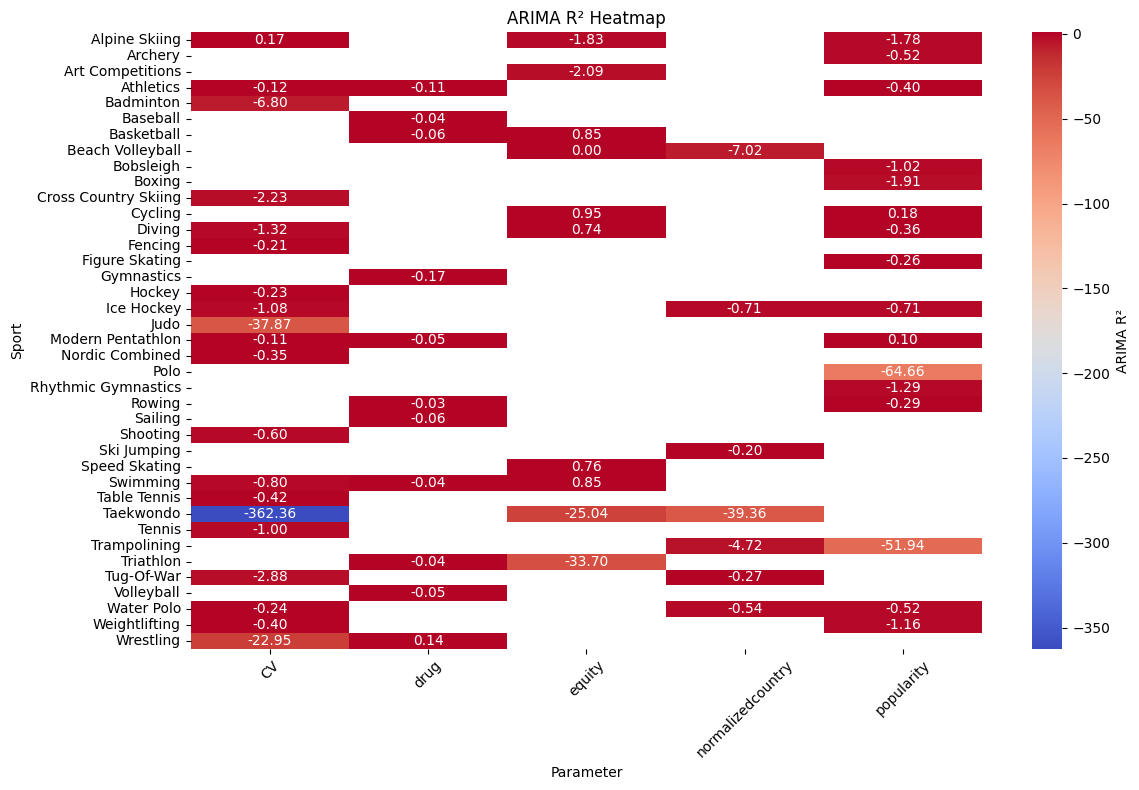

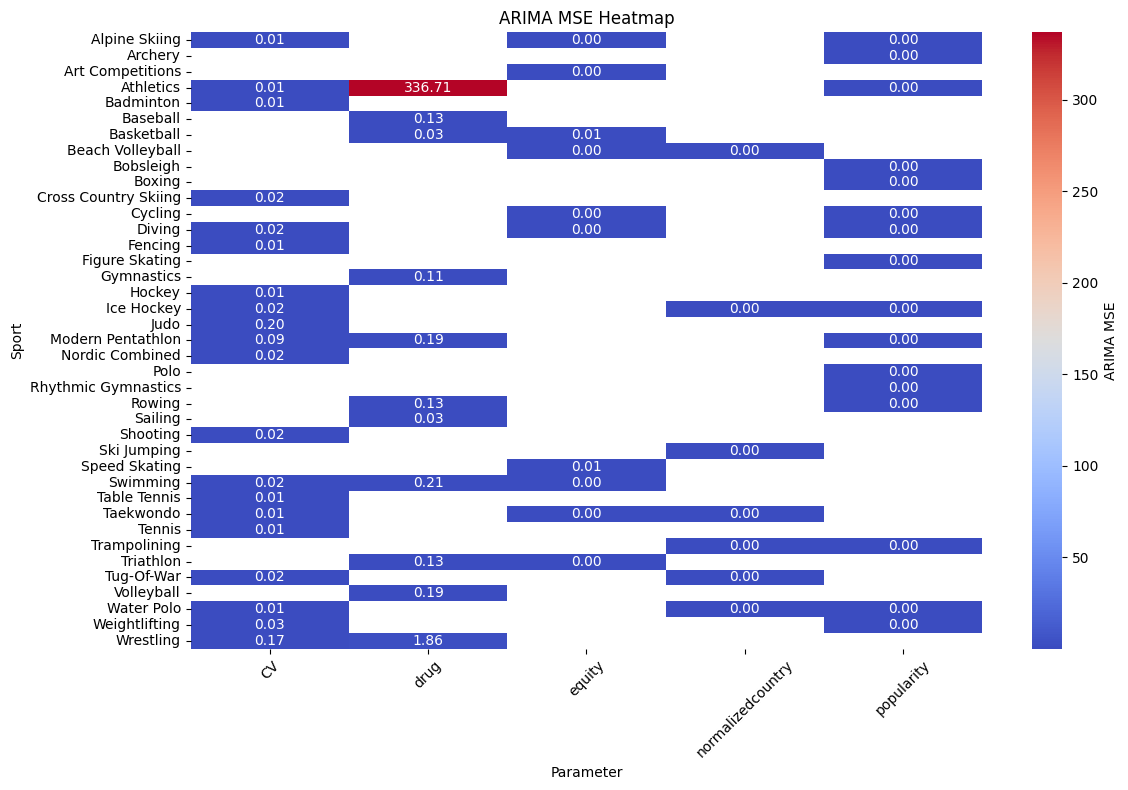

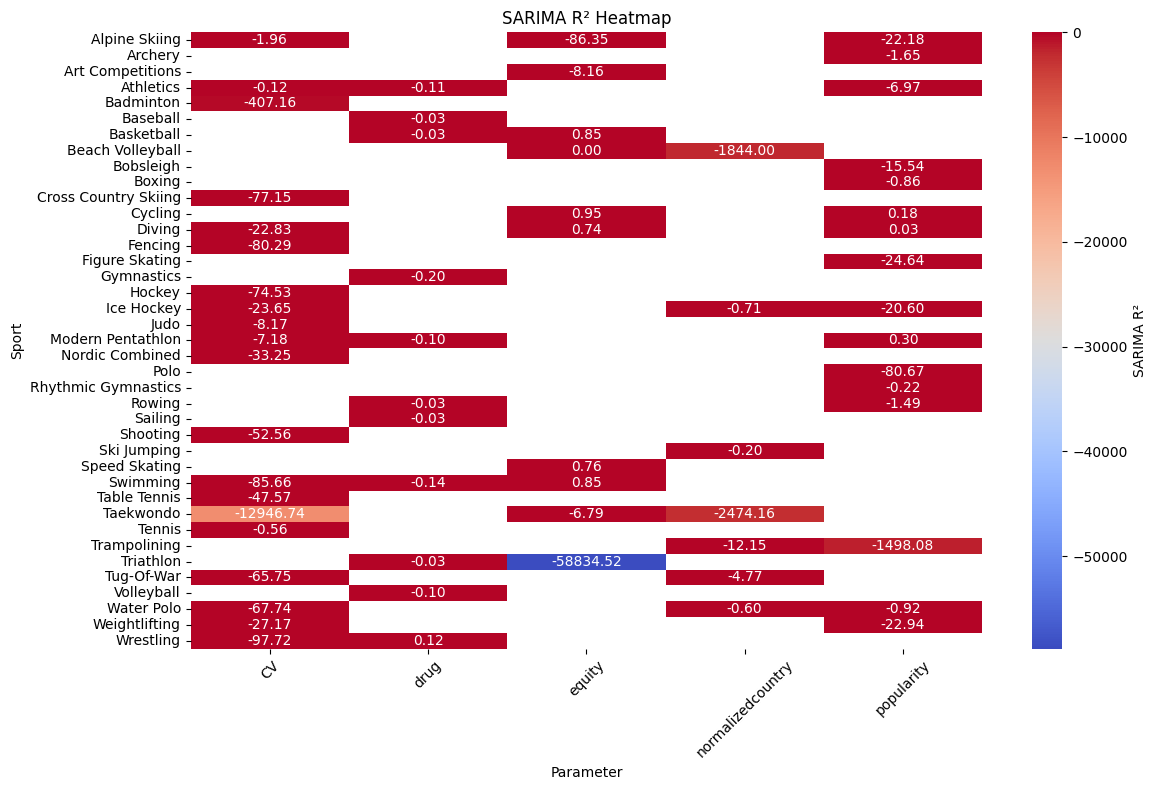

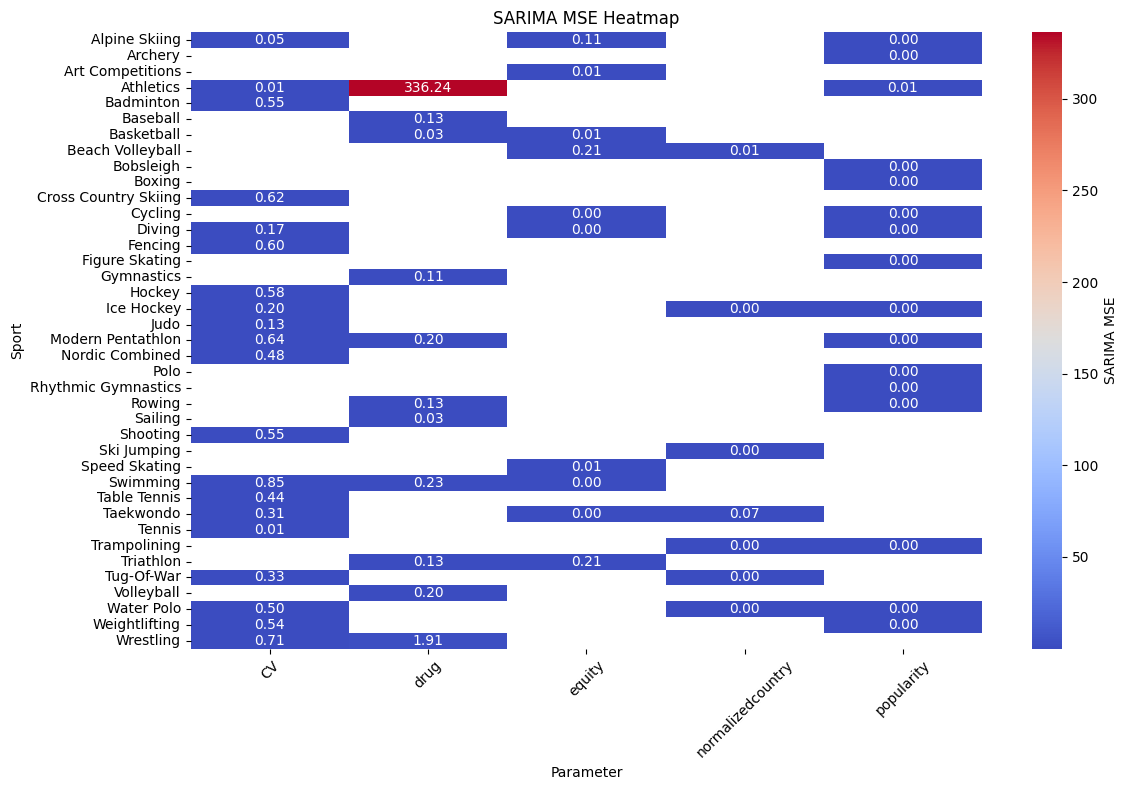

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load metrics data
metrics_df = pd.read_csv('model_metrics.csv')

# Function to create a pivot table
def create_model_matrix(metrics_df, metric, model_type):
    pivot_df = metrics_df[metrics_df['Model'] == model_type].pivot(
        index='Sport', columns='Parameter', values=metric
    )
    return pivot_df

# Handle empty matrix scenario in plotting
def plot_model_quality(matrix, title):
    if matrix.empty:
        print(f"No data available to plot for {title}.")
        return
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': title})
    plt.title(f'{title} Heatmap')
    plt.xlabel('Parameter')
    plt.ylabel('Sport')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Generate and plot for ARIMA R² and MSE
arima_r2_matrix = create_model_matrix(metrics_df, 'R2', 'ARIMA')
plot_model_quality(arima_r2_matrix, 'ARIMA R²')

arima_mse_matrix = create_model_matrix(metrics_df, 'MSE', 'ARIMA')
plot_model_quality(arima_mse_matrix, 'ARIMA MSE')

# Generate and plot for SARIMA R² and MSE
sarima_r2_matrix = create_model_matrix(metrics_df, 'R2', 'SARIMAX')
plot_model_quality(sarima_r2_matrix, 'SARIMA R²')

sarima_mse_matrix = create_model_matrix(metrics_df, 'MSE', 'SARIMAX')
plot_model_quality(sarima_mse_matrix, 'SARIMA MSE')
